# Implementación de Perceptrón

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
df = pd.read_csv('data/pima-indians-diabetes.csv')  # Asegúrate del nombre del archivo

# Dividir en variables independientes (X) y objetivo (y)
X = df.iloc[:, :-1].values  # todas las columnas excepto la última
y = df.iloc[:, -1].values   # la última columna

# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix

# Crear el modelo
perceptron = Perceptron(max_iter=1000, eta0=0.1, random_state=42)

# Entrenar
perceptron.fit(X_train, y_train)

# Predecir
y_pred = perceptron.predict(X_test)

# Evaluar
accuracy = accuracy_score(y_test, y_pred)
matriz_confusion = confusion_matrix(y_test, y_pred)

print(f"Precisión del perceptrón: {accuracy:.2f}")
print("Matriz de confusión:")
print(matriz_confusion)


Precisión del perceptrón: 0.70
Matriz de confusión:
[[68 29]
 [17 40]]


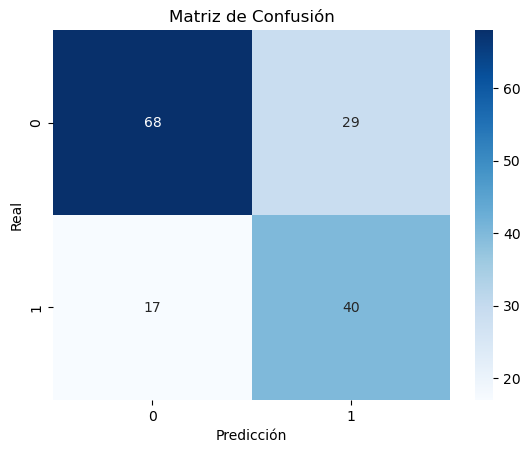

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4368\195714007.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


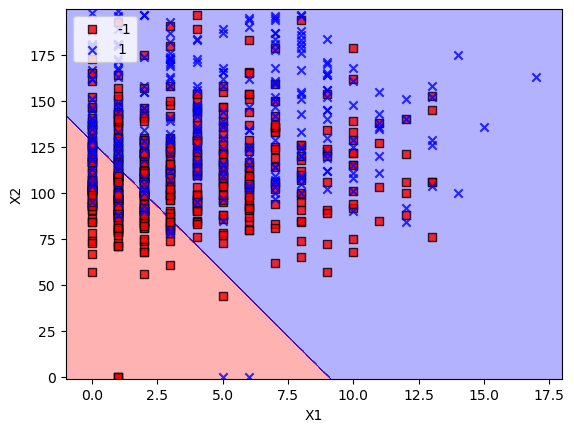

In [23]:
X_plot = X[:, [0, 1]]
ppn_plot = Perceptron(eta=0.5, n_iter=100)
ppn_plot.fit(X_plot, y)

plot_decision_regions(X_plot, y, classifier=ppn_plot)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.show()

In [24]:

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=20)
# plt.xlabel('X1')
# plt.ylabel('X2')
# plt.legend(loc='upper left')

# plt.show()

ValueError: shapes (9547500,2) and (8,) not aligned: 2 (dim 1) != 8 (dim 0)